# Visualize Layer Activations
for cell type classifier.

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from IPython.display import Image
from PIL import Image
from matplotlib import cm

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import label_image
import glob
import math

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

### Choose image to be classified.

In [4]:
# cell types: 'filopodia', 'smallbleb', 'actinedge', 'hemisphere', 'lamellipodia'

cell_type = 'lamellipodia'
cell_num = 32
directory = 'original_cell_type_images/'


file_name = directory+cell_type+'/'+cell_type+'_'+str(cell_num)+'.jpg'
#file_name = 'images/original_set/unseen_validation/filopodia/cell1.jpg'
print(file_name)
print('Cell Type:', cell_type)
Image.open(file_name)

original_cell_type_images/lamellipodia/lamellipodia_32.jpg
Cell Type: lamellipodia


FileNotFoundError: [Errno 2] No such file or directory: 'original_cell_type_images/lamellipodia/lamellipodia_32.jpg'

In [8]:
# Available Trained models
# If not available in repo, first generate using retrain_helper.ipynb
inception_v1 = "output_files/output_graph_inception_v1.pb" # Final Test Accuracy: 90.0%
inception_v1_p = "output_files/output_graph_inception_v1_partial.pb" # Final Test Accuracy: 89.0%
inception_v2 = "output_files/output_graph_inception_v2.pb" # Final Test Accuracy: 90.0%. Not available in repo.
inception_v3 = "output_files/output_graph_inception_v3.pb" # Final Test Accuracy: 94.3%. Not available in repo.
mobilenet_v1 = 'output_files/output_graph_mobilenet_v1.pb' # Final Test Accuracy: 94.3%
mobilenet_v1_original_set = 'output_files/output_graph_mobilenet_v1_original_set.pb' # Final Test Accuracy: 94.7% 
mobilenet_v2 = 'output_files/output_graph_mobilenet_v2.pb' # Final Test Accuracy: 92.2% 
inception_resnet_v2 = 'output_files/output_graph_inception_resnet_v2.pb' # Final Test Accuracy: 86.4%. Not available in repo.

#### Choose Model (model_file)...

In [9]:
model_file = mobilenet_v1_original_set


# other paramaters with default values
label_file = "output_files/output_labels.txt"
input_height = 224
input_width = 224
input_mean = 0
input_std = 255
input_layer = 'Placeholder'
output_layer = 'final_result'

#### Run Prediction...

In [10]:
graph = label_image.load_graph(model_file)
t = label_image.read_tensor_from_image_file(
    file_name,
    input_height=input_height,
    input_width=input_width,
    input_mean=input_mean,
    input_std=input_std)

input_name = "import/" + input_layer
output_name = "import/" + output_layer
input_operation = graph.get_operation_by_name(input_name)
output_operation = graph.get_operation_by_name(output_name)

with tf.Session(config=config, graph=graph) as sess:
    results = sess.run(output_operation.outputs[0], {
    input_operation.outputs[0]: t
    })
    results = np.squeeze(results)

top_k = results.argsort()[-5:][::-1]
labels = label_image.load_labels(label_file)
predict = []
for i in top_k:
    predict.append([labels[i], results[i]])

#### Print Results...

Cell Type: lamellipodia
Best Prediction: lamellipodia 
 
['lamellipodia', 0.9643649]
['filopodia', 0.029537492]
['actinedge', 0.0060975165]
['hemisphere', 9.423167e-08]
['smallbleb', 7.048556e-09]


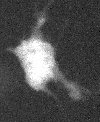

In [14]:
print('Cell Type:', cell_type)
print('\033[1m'+'Best Prediction:',predict[0][0],'\n','\033[0m')
for i in predict:
    print(i)
    
Image.open(file_name)

## Visualize Layers

In [15]:
def getActivations(layer, input_op, stimuli):
    output_layer=graph.get_operation_by_name(layer)
    units = sess.run(output_layer.outputs[0], {
    input_op.outputs[0]: t})
    #results = np.squeeze(results)
    plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,math.ceil(filters)))
    n_columns = 5
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i),fontsize=16)
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="hot")
        plt.colorbar()
    plt.tight_layout()

In [16]:
graph = label_image.load_graph(model_file)
t = label_image.read_tensor_from_image_file(
    file_name,
    input_height=input_height,
    input_width=input_width,
    input_mean=input_mean,
    input_std=input_std)

input_name = "import/" + input_layer
output_name = "import/" + output_layer
input_operation = graph.get_operation_by_name(input_name)
output_operation = graph.get_operation_by_name(output_name)

operations = graph.get_operations()
op_names=[]
for operation in operations:
    op_names.append(operation.name)
    #print(operation.name)

### Relu Layer Activations

#####         Print layer names...

In [18]:
relu_layers= [x for x in op_names if x.rfind('Relu')>(len(x)-8)]
for i,x in enumerate(relu_layers):
    print(str(i)+':',x)

0: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_0/Relu6
1: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_1_depthwise/Relu6
2: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_1_pointwise/Relu6
3: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_2_depthwise/Relu6
4: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_2_pointwise/Relu6
5: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_3_depthwise/Relu6
6: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_3_pointwise/Relu6
7: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_4_depthwise/Relu6
8: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_4_pointwise/Relu6
9: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_5_depthwise/Relu6
10: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_5_pointwise/Relu6
11: import/module_apply_default/MobilenetV1/MobilenetV1/Conv2d_6_depthwise/Relu6
12: import/module_apply_default/MobilenetV1/Mobi

#####         Visualize...

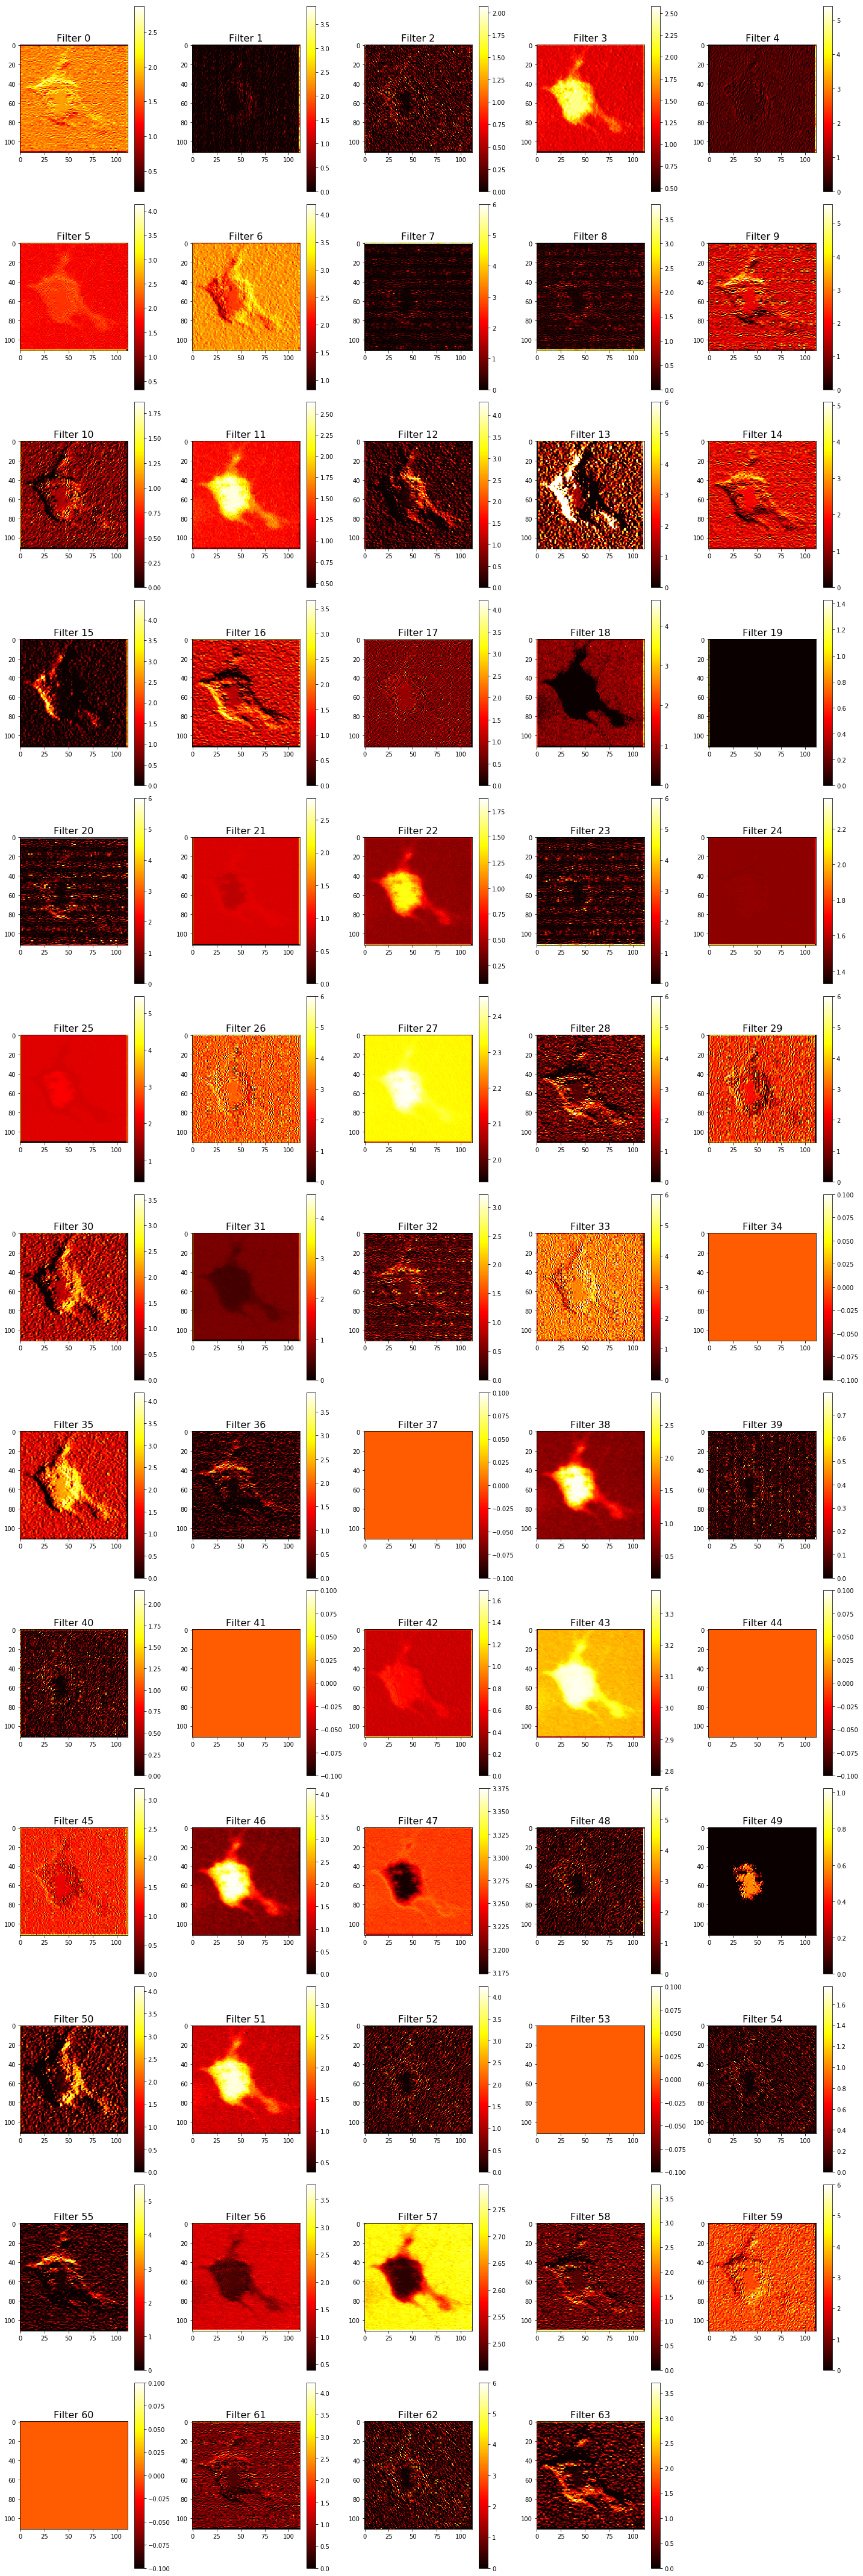

In [19]:
## Choose layer number to be visualized
relu_num = 2

with tf.Session(graph=graph) as sess:
    getActivations(relu_layers[relu_num],input_operation, t)

### Convolution layers (Conv2D)

#####         Print layer names...

In [1]:
conv_layers = [x for x in op_names if x.rfind('Conv')>(len(x)-8)]
for i,x in enumerate(conv_layers):
    print(str(i)+':',x)

NameError: name 'op_names' is not defined

#####         Visualize...

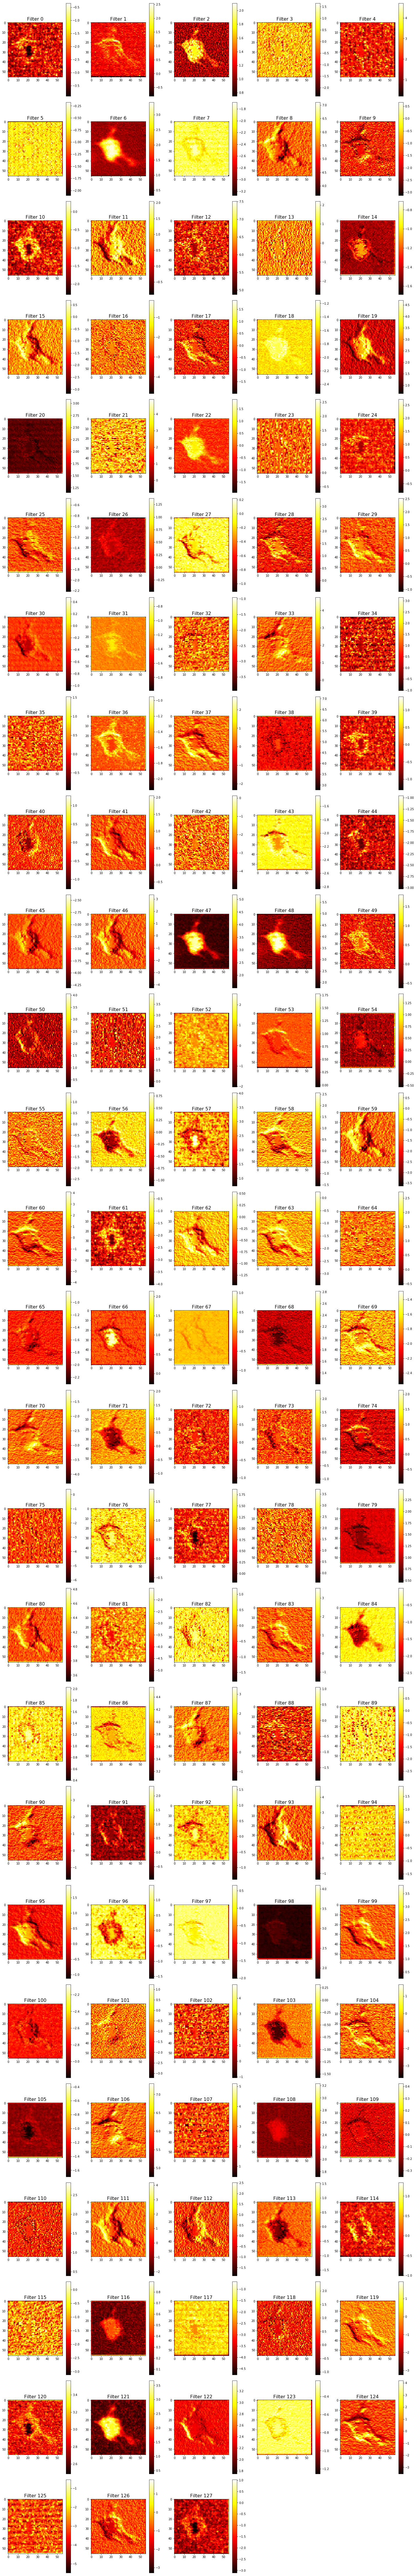

In [20]:
## Choose layer number to be visualized
conv_num = 2

with tf.Session(graph=graph) as sess:
    getActivations(conv_layers[conv_num],input_operation, t)